In [107]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.legend_handler import HandlerLine2D


In [104]:
file= open("data1.txt")
data= np.loadtxt(file, delimiter=',')
print(data.shape)


(97, 2)


In [105]:
m=len(data)
X=np.array(list(zip(*data))[0]).reshape(m,1)
Y=np.array(list(zip(*data))[1]).reshape(m,1)
print(len(X), len(Y))

97 97


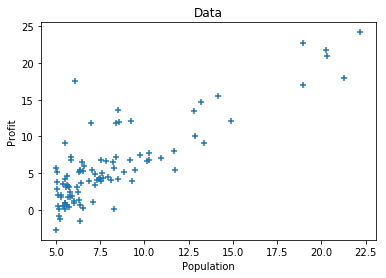

In [106]:
plt.scatter(X,Y, s=30, marker='+')
plt.title("Data")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

In [7]:
n=np.ones((m,1))


In [122]:
theta= np.zeros([1,2]).reshape(2,1)
print(theta)
x= np.c_[n, X]
y=Y
print(x.shape, theta.shape)

[[ 0.]
 [ 0.]]
(97, 2) (2, 1)


In [123]:
def gradient_descent(x,y,theta, rate, m, iterations, showItr=False):
    plt.ion()
    a=[]
    b=[]
    for i in range(0, iterations):
        hq= x.dot(theta)
        error= hq-y
        cost= np.sum(error**2)/(2*m)
        if((i%10==0) and showItr):
            print("Iteration %d | Cost: %f" % (i, cost))
        gradient= (x.T).dot(error)/m
        theta= theta- rate*gradient
        a.append(theta)
        b.append(cost)
        
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')
#         ax.scatter(theta[0],theta[1], cost,c='r', marker='o')
#         display.display(plt.gcf())
#         display.clear_output(wait=True)
#         time.sleep(1)
#     plt.show()
    a=np.array(a).reshape(len(a),2)
    b=np.array(b).reshape(len(b),1)
    line2, = plt.plot(a[:,1], b, label='Theta 1')
    line1, = plt.plot(a[:,0], b, label= 'Theta 0')
    plt.xlabel("Theta")
    plt.ylabel("Cost Function")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
    return theta
        

[[-3.24140214]
 [ 1.1272942 ]]


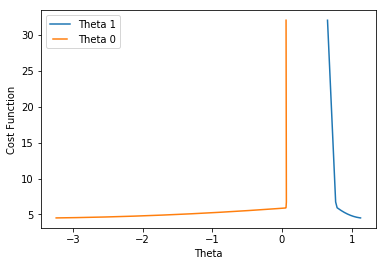

In [124]:
Rate=0.01
updated_theta=gradient_descent(x,y,theta, Rate, m,1000)
print(updated_theta)

In [128]:
print("hypothesis : Hq(X) = %f  +  %f*X" % (updated_theta[0], updated_theta[1]))

hypothesis : Hq(X)= -3.241402  +  1.127294*X


In [180]:
for i in range(x.shape[0]):
        y_predict = updated_theta[0] + updated_theta[1]*x[:,1] 


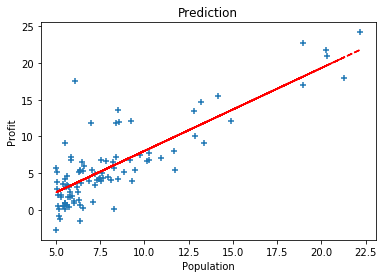

In [183]:
# plt.scatter(x[:,1],y, s=30, marker='+')
plt.scatter(x[:,1],y,s=30, marker='+')
plt.plot(x[:,1], y_predict, 'r--')
plt.title("Prediction")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()